# 🎓 **Taller 2.1: Análisis Exploratorio - Dataset Titanic**
## 📊 Estadísticas Descriptivas Generales, Univariables y Multivariables

## OBJETIVOS DEL TALLER:
* ✅ Obtener estadísticas descriptivas generales del dataset
* ✅ Analizar variables individuales (univariables)
* ✅ Explorar relaciones entre variables (multivariables)
* ✅ Practicar visualizaciones básicas
* ✅ Preparar datos para análisis avanzados

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoAnalisisExploratorioTitanic.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [5]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/titanic.csv'
      df = pd.DataFrame(pd.read_csv(path))
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/titanic.csv"
            df = pd.read_csv(url)
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [8]:
# Cargar dataset
titanic_df = cargar_dataset()

if titanic_df is not None:
    print(f"📊 Dataset cargado: {titanic_df.shape[0]} filas, {titanic_df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(titanic_df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 891 filas, 12 columnas
🔍 Primeras filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 🎯 **EJERCICIO 1: ESTADÍSTICAS DESCRIPTIVAS GENERALES**

In [27]:
def obtener_estadisticas_generales(df):
    estadisticas = {}
    if df is None:
        return estadisticas
    # Total de pasajeros (filas)
    estadisticas['total_pasajeros'] = int(df.shape[0])
    # Número de columnas
    estadisticas['total_columnas'] = int(df.shape[1])
    # Tipos de datos únicos por columna
    estadisticas['tipos_datos'] = df.dtypes.apply(lambda x: str(x)).to_dict()
    # Tasa de supervivencia global (si existe la columna 'survived')
    if 'survived' in df.columns:
        try:
            estadisticas['tasa_supervivencia'] = float(df['survived'].mean())
        except Exception:
            estadisticas['tasa_supervivencia'] = None
    else:
        estadisticas['tasa_supervivencia'] = None
    # Valores nulos por columna
    estadisticas['nulos_por_columna'] = df.isnull().sum().to_dict()
    # Estadísticas numéricas resumen
    estadisticas['describe_numerico'] = df.select_dtypes(include='number').describe().to_dict()
    return estadisticas


In [28]:
# Ejecutar funciones
print("🔍 Ejecutando análisis general...")
estadisticas = obtener_estadisticas_generales(titanic_df)

# Mostrar resultados
print("\n" + "=" * 40)
print("📈 ESTADÍSTICAS CALCULADAS")
print("=" * 40)
for key, value in estadisticas.items():
    print(f"{key}: {value}")

🔍 Ejecutando análisis general...

📈 ESTADÍSTICAS CALCULADAS
total_pasajeros: 891
total_columnas: 12
tipos_datos: {'PassengerId': 'int64', 'Survived': 'int64', 'Pclass': 'int64', 'Name': 'object', 'Sex': 'object', 'Age': 'float64', 'SibSp': 'int64', 'Parch': 'int64', 'Ticket': 'object', 'Fare': 'float64', 'Cabin': 'object', 'Embarked': 'object'}
tasa_supervivencia: None
nulos_por_columna: {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}
describe_numerico: {'PassengerId': {'count': 891.0, 'mean': 446.0, 'std': 257.3538420152301, 'min': 1.0, '25%': 223.5, '50%': 446.0, '75%': 668.5, 'max': 891.0}, 'Survived': {'count': 891.0, 'mean': 0.3838383838383838, 'std': 0.4865924542648585, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 1.0, 'max': 1.0}, 'Pclass': {'count': 891.0, 'mean': 2.308641975308642, 'std': 0.8360712409770513, 'min': 1.0, '25%': 2.0, '50%': 3.0, '75%': 3.0, 'max': 3.0}, 'Ag

# 📈 **EJERCICIO 2: ANÁLISIS UNIVARIABLE**

In [31]:
def analisis_univariable(df, columna):
    '''Realiza análisis univariable para una columna específica.'''


    results = {'columna': columna}
    if columna not in df.columns:
        results['error'] = 'Columna no encontrada'
        return results

    ser = df[columna]
    results['tipo'] = str(ser.dtype)
    results['cantidad_nulos'] = int(ser.isnull().sum())
    results['cantidad_unicos'] = int(ser.nunique(dropna=True))
    if pd.api.types.is_numeric_dtype(ser):
        results['media'] = float(ser.mean(skipna=True))
        results['mediana'] = float(ser.median(skipna=True))
        results['min'] = float(ser.min(skipna=True))
        results['max'] = float(ser.max(skipna=True))
        results['std'] = float(ser.std(skipna=True))
        results['skew'] = float(ser.skew(skipna=True))
    else:
        # Categórica
        vc = ser.value_counts(dropna=True)
        top = vc.index[0] if not vc.empty else None
        results['top_1'] = top
        results['top_1_count'] = int(vc.iloc[0]) if not vc.empty else 0

    return results


In [32]:
def visualizar_univariable(df, columna):
    '''Crea visualizaciones sencillas para una columna.'''

    if columna not in df.columns:
        print('Columna no encontrada:', columna)
        return

    ser = df[columna]

    if pd.api.types.is_numeric_dtype(ser):
        fig, axes = plt.subplots(1,2, figsize=(12,4))
        ser.hist(ax=axes[0], bins=30)
        axes[0].set_title(f'Histograma de {columna}')
        axes[0].set_xlabel(columna)
        axes[0].set_ylabel('Frecuencia')
        # Boxplot
        axes[1].boxplot(ser.dropna())
        axes[1].set_title(f'Boxplot de {columna}')
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        sns.countplot(x=columna, data=df, ax=ax[0])
        ax[0].set_title(f'Conteo por categoría - {columna}')
        # Pie (porcentaje)
        ser.value_counts(dropna=True).plot.pie(autopct='%1.1f%%', ax=ax[1])
        ax[1].set_ylabel('')
        ax[1].set_title(f'Porcentaje - {columna}')
        plt.tight_layout()
        plt.show()


🔍 ANÁLISIS UNIVARIABLE

📊 ANÁLISIS DE: AGE
Estadísticas:
  columna: age
  tipo: float64
  cantidad_nulos: 177
  cantidad_unicos: 88
  media: 29.69911764705882
  mediana: 28.0
  min: 0.42
  max: 80.0
  std: 14.526497332334044
  skew: 0.38910778230082704


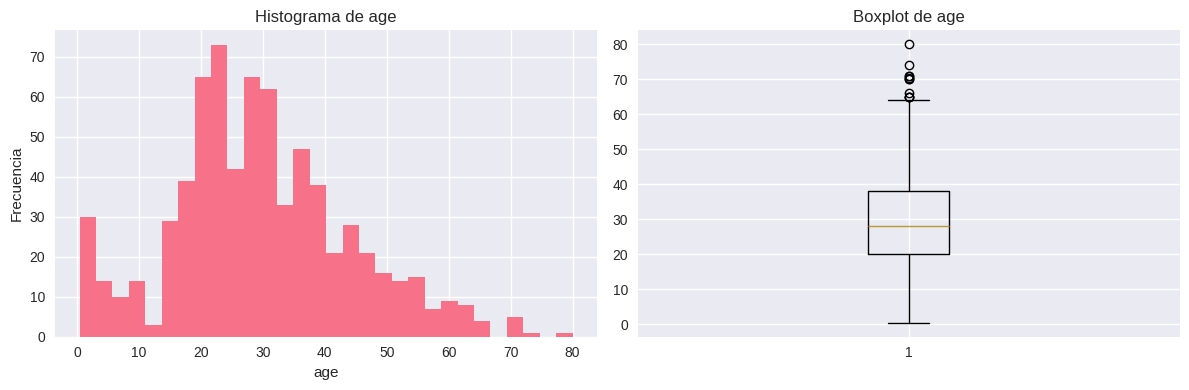


📊 ANÁLISIS DE: FARE
Estadísticas:
  columna: fare
  tipo: float64
  cantidad_nulos: 0
  cantidad_unicos: 248
  media: 32.204207968574636
  mediana: 14.4542
  min: 0.0
  max: 512.3292
  std: 49.693428597180905
  skew: 4.787316519674893


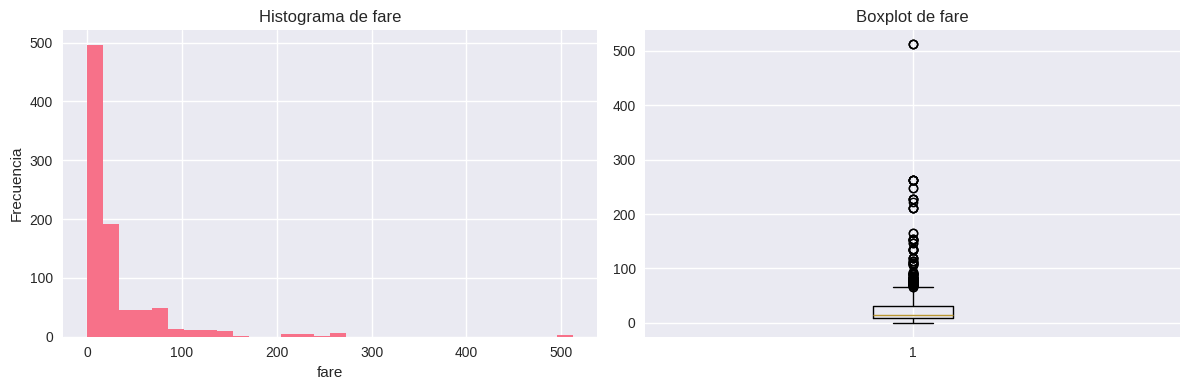


📊 ANÁLISIS DE: SEX
Estadísticas:
  columna: sex
  tipo: object
  cantidad_nulos: 0
  cantidad_unicos: 2
  top_1: male
  top_1_count: 577


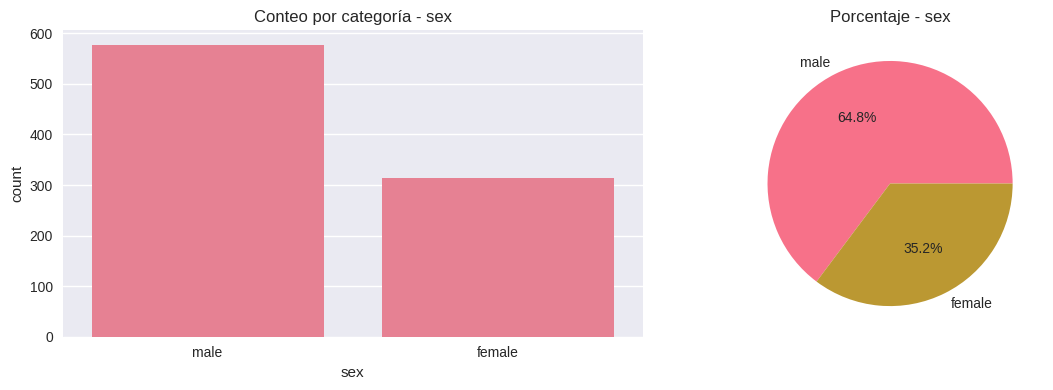


📊 ANÁLISIS DE: PCLASS
Estadísticas:
  columna: pclass
  tipo: int64
  cantidad_nulos: 0
  cantidad_unicos: 3
  media: 2.308641975308642
  mediana: 3.0
  min: 1.0
  max: 3.0
  std: 0.8360712409770513
  skew: -0.6305479068752845


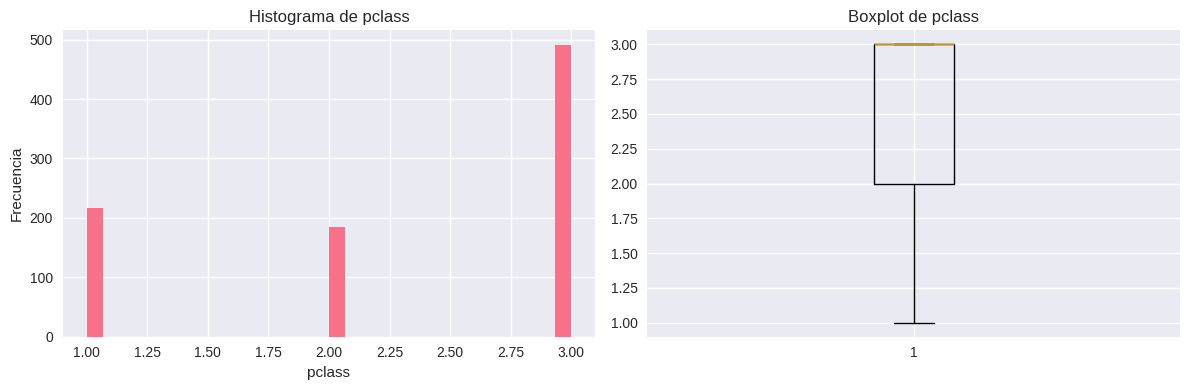

In [33]:
# Análisis para variables específicas
print("🔍 ANÁLISIS UNIVARIABLE")
titanic_df.columns = titanic_df.columns.str.lower()

variables_analizar = ['age', 'fare', 'sex', 'pclass']

for var in variables_analizar:
    if var in titanic_df.columns:
        print(f"\n" + "="*50)
        print(f"📊 ANÁLISIS DE: {var.upper()}")
        print("="*50)

        stats = analisis_univariable(titanic_df, var)
        print("Estadísticas:")
        for key, value in stats.items():
            print(f"  {key}: {value}")

        visualizar_univariable(titanic_df, var)
    else:
        print(f"❌ Columna '{var}' no encontrada")

# 🔄 **EJERCICIO 3: ANÁLISIS MULTIVARIABLE**

In [37]:
def analisis_multivariable(df):
    '''Realiza análisis de relaciones entre variables.'''

    if df is None:
        print('DataFrame vacío')

    # Matriz de correlación (solo numéricas)
    numeric = df.select_dtypes(include='number')
    if numeric.shape[1] > 1:
        correlation_matrix = numeric.corr()
        print('Matriz de correlación (numéricas):')

        display(correlation_matrix)

        plt.figure(figsize=(8,6))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
        plt.title('Correlación entre variables numéricas')
        plt.show()

    # Relación supervivencia por sexo y clase
    if 'survived' in df.columns:
        print('\nTasa de supervivencia por sexo:')
        if 'sex' in df.columns:
            print(df.groupby('sex')['survived'].mean())

        if 'pclass' in df.columns:
            print('\nTasa de supervivencia por clase:')
            print(df.groupby('pclass')['survived'].mean())

    # Algunas relaciones visuales
    if 'age' in df.columns and 'survived' in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='survived', y='age', data=df)
        plt.title('Edad por supervivencia')
        plt.show()

    if 'fare' in df.columns and 'survived' in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='survived', y='fare', data=df)
        plt.title('Tarifa por supervivencia')
        plt.show()



Matriz de correlación (numéricas):


,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


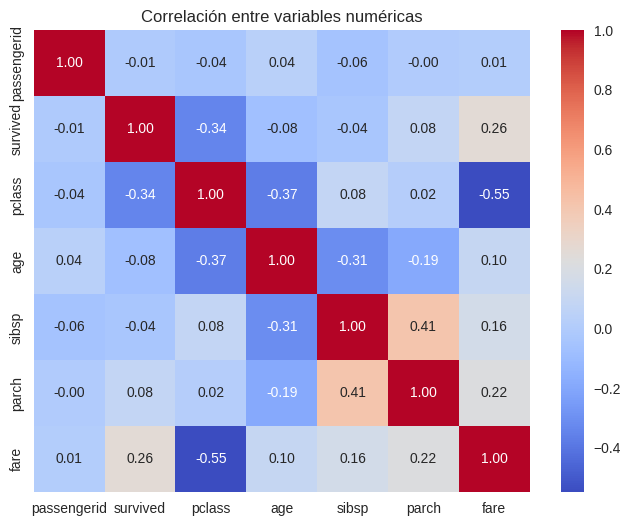


Tasa de supervivencia por sexo:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Tasa de supervivencia por clase:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


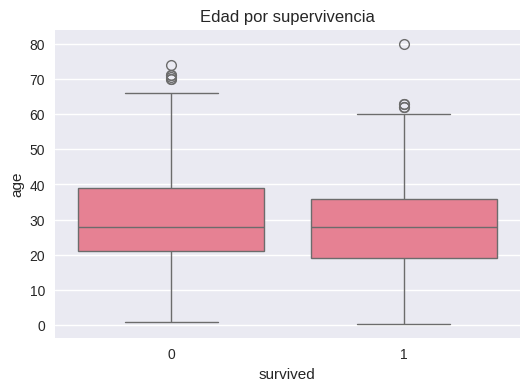

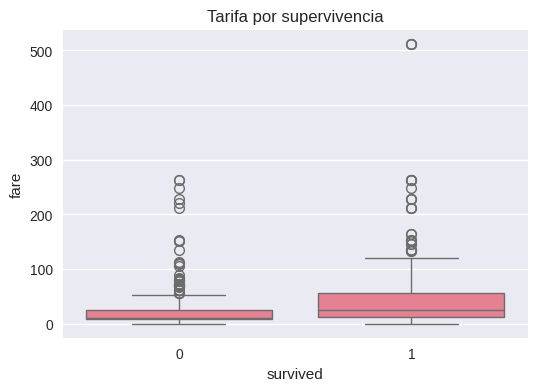

In [38]:
# Ejecutar análisis multivariable
analisis_multivariable(titanic_df)

# ✅ **EJERCICIO 4: REPORTE FINAL - CONCLUSIONES**

In [63]:
def generar_reporte_final(df):
    if df is None or df.empty:
        print('No hay datos para generar el reporte.')
        return

    print('--- REPORTE FINAL: Titanic - Análisis Exploratorio ---\n')

    # Estadísticas generales
    est = obtener_estadisticas_generales(df)
    print(f"Total pasajeros: {est.get('total_pasajeros')}")
    tasa = est.get('tasa_supervivencia')
    if tasa is not None:
        print(f"Tasa de supervivencia global: {tasa:.2%}")

    print('\nVariables con más valores nulos:')
    nulos = est.get('nulos_por_columna', {})
    for k,v in sorted(nulos.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f" - {k}: {v} nulos")

    # Análisis multivariable
    print('\nAnálisis multivariable breve:')
    analisis_multivariable(df)

    # Análisis univariable
    print('\n🔍 ANÁLISIS UNIVARIABLE')
    df.columns = df.columns.str.lower()  # asegurar minúsculas
    variables_analizar = ['age', 'fare', 'sex', 'pclass']

    for var in variables_analizar:
        if var in df.columns:
            print("\n" + "="*50)
            print(f"📊 ANÁLISIS DE: {var.upper()}")
            print("="*50)

            # Estadísticas
            stats = analisis_univariable(df, var)
            print("Estadísticas:")
            for key, value in stats.items():
                print(f"  {key}: {value}")

            # Visualización
            visualizar_univariable(df, var)
        else:
            print(f"❌ Columna '{var}' no encontrada")


✅ Dataset cargado desde URL GitHub
--- REPORTE FINAL: Titanic - Análisis Exploratorio ---

Total pasajeros: 891

Variables con más valores nulos:
 - Cabin: 687 nulos
 - Age: 177 nulos
 - Embarked: 2 nulos
 - PassengerId: 0 nulos
 - Survived: 0 nulos

Análisis multivariable breve:
Matriz de correlación (numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


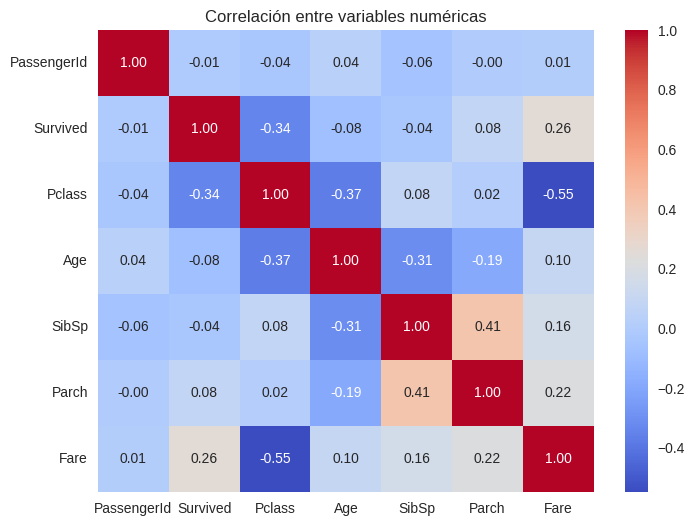


🔍 ANÁLISIS UNIVARIABLE

📊 ANÁLISIS DE: AGE
Estadísticas:
  columna: age
  tipo: float64
  cantidad_nulos: 177
  cantidad_unicos: 88
  media: 29.69911764705882
  mediana: 28.0
  min: 0.42
  max: 80.0
  std: 14.526497332334044
  skew: 0.38910778230082704


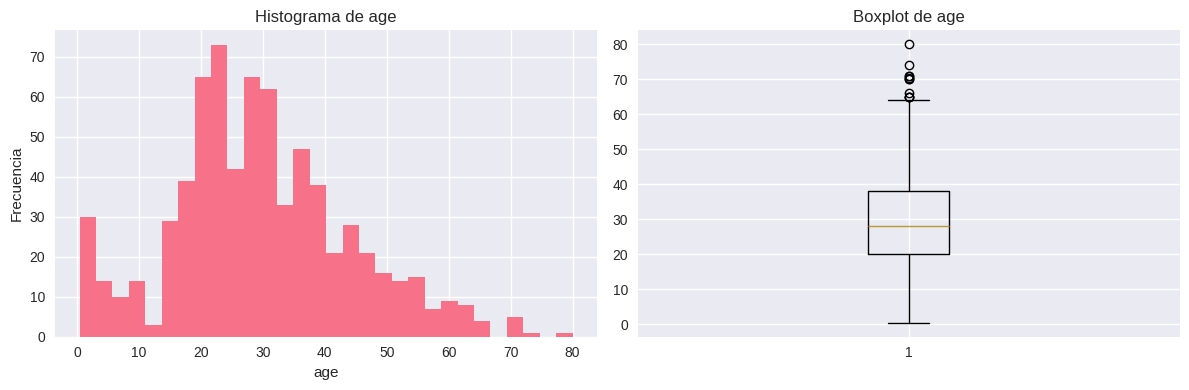


📊 ANÁLISIS DE: FARE
Estadísticas:
  columna: fare
  tipo: float64
  cantidad_nulos: 0
  cantidad_unicos: 248
  media: 32.204207968574636
  mediana: 14.4542
  min: 0.0
  max: 512.3292
  std: 49.693428597180905
  skew: 4.787316519674893


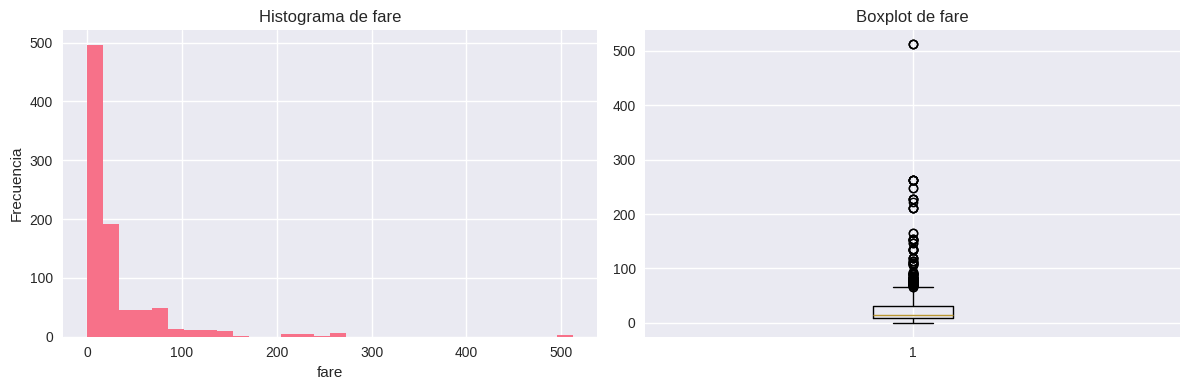


📊 ANÁLISIS DE: SEX
Estadísticas:
  columna: sex
  tipo: object
  cantidad_nulos: 0
  cantidad_unicos: 2
  top_1: male
  top_1_count: 577


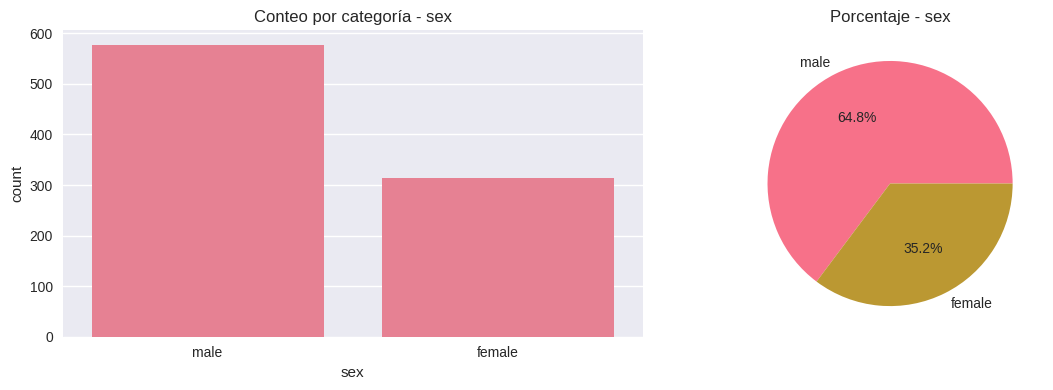


📊 ANÁLISIS DE: PCLASS
Estadísticas:
  columna: pclass
  tipo: int64
  cantidad_nulos: 0
  cantidad_unicos: 3
  media: 2.308641975308642
  mediana: 3.0
  min: 1.0
  max: 3.0
  std: 0.8360712409770513
  skew: -0.6305479068752845


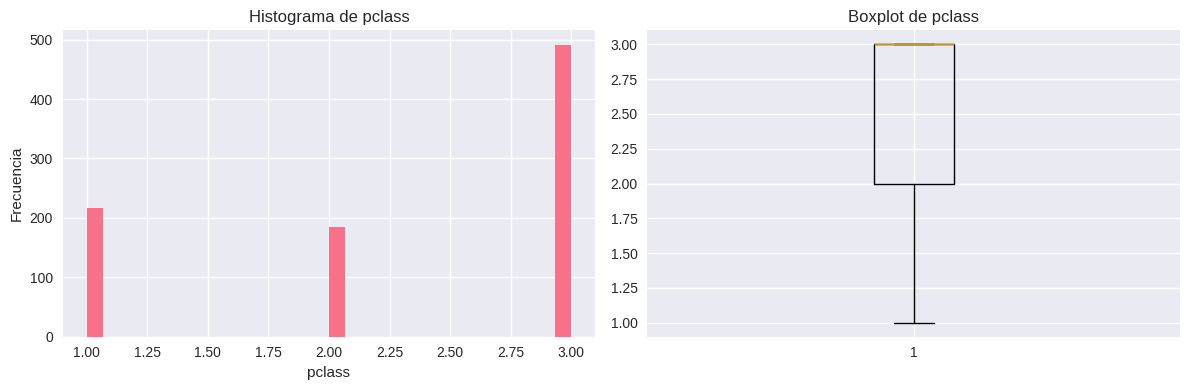


🔎 CONCLUSIONES:
- Mayor tasa de supervivencia en mujeres y clase alta.
- Edad promedio ~30 años, con alta mortalidad en adultos jóvenes.
- Alta correlación entre tarifa (fare) y clase (pclass).


In [64]:
# Generar reporte
df = cargar_dataset()
generar_reporte_final(df)
print("\n🔎 CONCLUSIONES:")
print("- Mayor tasa de supervivencia en mujeres y clase alta.")
print("- Edad promedio ~30 años, con alta mortalidad en adultos jóvenes.")
print("- Alta correlación entre tarifa (fare) y clase (pclass).")



# 🚀 ¡TALLER FINALIZADO!"